In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"D:\codex techno project\9th--Autocomplete and Autocorrect Data Analytics\Dataset\archive (5)\creditcard.csv")
print(" CSV Loaded!")
df.head()


 CSV Loaded!


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
 from sklearn.preprocessing import StandardScaler

# Scale 'Amount' and 'Time'
df['scaled_amount'] = StandardScaler().fit_transform(df[['Amount']])
df['scaled_time'] = StandardScaler().fit_transform(df[['Time']])

# Drop old columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Reorder columns
df = df[['scaled_time', 'scaled_amount'] + [col for col in df.columns if col not in ['scaled_time', 'scaled_amount', 'Class']] + ['Class']]
df.head()


,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [9]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print ROC-AUC Score
print(" ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.71      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

 ROC-AUC Score: 0.8547121437047576


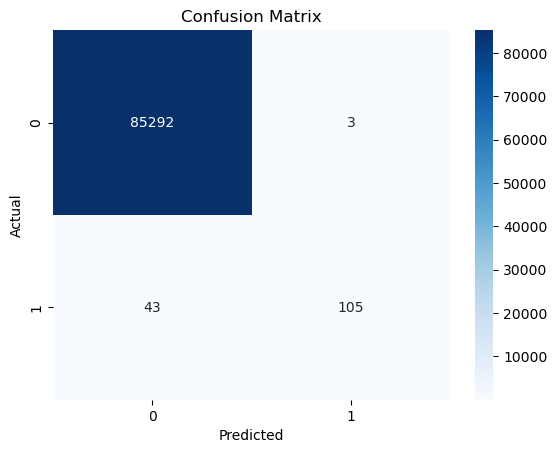

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


####  Key Insights:
- **True Positives (105)**: Fraudulent transactions correctly identified.
- **True Negatives (85,292)**: Non-fraud transactions correctly identified.
- **False Negatives (43)**: Fraud transactions missed by the model (needs attention).
- **False Positives (3)**: Very few non-fraud transactions wrongly flagged as fraud.


In [12]:
plt.savefig("confusion_matrix.png")
 

<Figure size 640x480 with 0 Axes>

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, preds))
    print("ROC-AUC Score:", roc_auc_score(y_test, preds))
    print("-" * 50)

 

Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.61      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8073445023075716
--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.70      0.81       148

    accuracy                           1.00     85443
   macro avg       0.98      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8513279033180552
--------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     8529